<a href="https://colab.research.google.com/github/MikhailKuklin/time-series-analysis-forecasting/blob/main/ts_data_visualization_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing

In [92]:
# libraries

import numpy as np
import pandas as pd
from matplotlib import dates
%matplotlib inline

In [37]:
# download data and parse date to datetime

df = pd.read_csv('espoo_2020_2022.csv',
                 parse_dates= {"date" : ["Year","m","d","Time"]},
                keep_date_col=True)

In [38]:
# check df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17569 entries, 0 to 17568
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    17569 non-null  datetime64[ns]
 1   Year                    17569 non-null  object        
 2   m                       17569 non-null  object        
 3   d                       17569 non-null  object        
 4   Time                    17569 non-null  object        
 5   Time zone               17569 non-null  object        
 6   Air temperature (degC)  17566 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 960.9+ KB


In [130]:
# rename column

df['Temperature (C)'] = df['Air temperature (degC)']
df.drop(['Air temperature (degC)'],axis=1, inplace=True)

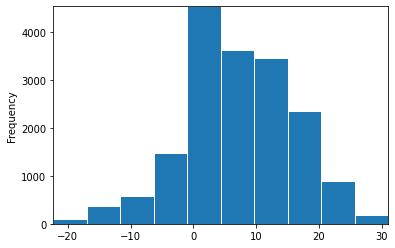

In [40]:
# check hist for temperature

df['Air temperature (degC)'].plot.hist(edgecolor='w').autoscale(enable=True,axis='both',tight=True)

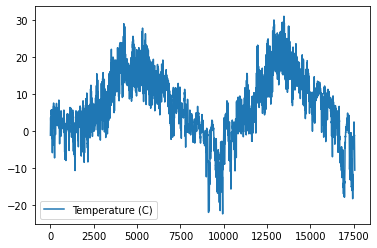

In [41]:
# check temperatures

df.plot.line(y='Temperature (C)')

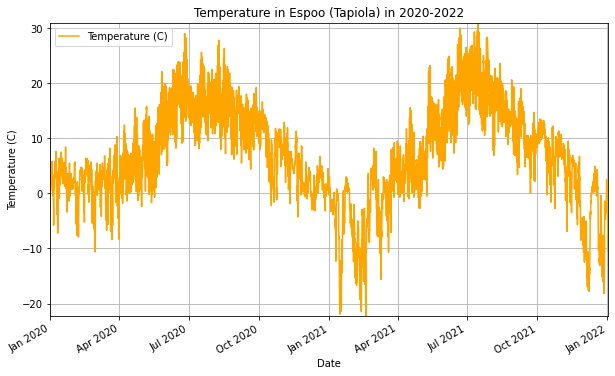

In [116]:
# check tenmperature

title = 'Temperature in Espoo (Tapiola) in 2020-2022'
xlabel = 'Date'
ylabel = 'Temperature (C)'
ax=df.plot.line(x='date',y='Temperature (C)',figsize=(10,6),c='orange')
ax.autoscale(axis='both',tight=True)
#ax.xaxis.set_major_locator(dates.WeekdayLocator(bymonth=0))
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y'))

#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

ax.xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax.xaxis.grid(True)
ax.yaxis.grid(True)

ax.set(title=title, xlabel = xlabel, ylabel = ylabel);

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17566 entries, 0 to 17568
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    17566 non-null  datetime64[ns]
 1   Year                    17566 non-null  object        
 2   m                       17566 non-null  object        
 3   d                       17566 non-null  object        
 4   Time                    17566 non-null  object        
 5   Time zone               17566 non-null  object        
 6   Air temperature (degC)  17566 non-null  float64       
 7   Temperature (C)         17566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 1.2+ MB


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


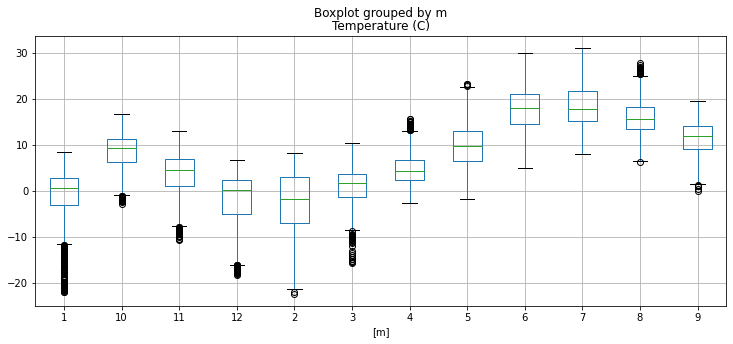

In [132]:
#check box plot by month

df_m = df.copy()

df_m = df_m.sort_values('m')

#df.plot.box(y=['Temperature (C)']);

df_m.boxplot(by='m',figsize=(12,5));

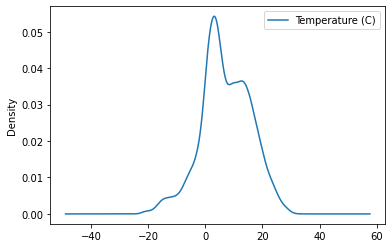

In [44]:
# check kde

df[['Temperature (C)']].plot.kde();

In [45]:
# drop duplicated and nas

df=df.drop_duplicates()

df.dropna(axis=0,inplace=True)

df.shape

(17566, 8)

Time resampling

In [48]:
df2 = df.set_index('date')

df2.head()

,Year,m,d,Time,Time zone,Air temperature (degC),Temperature (C)
date,,,,,,,
2020-01-01 00:00:00,2020,1,1,00:00,UTC,-1.1,-1.1
2020-01-01 01:00:00,2020,1,1,01:00,UTC,-0.2,-0.2
2020-01-01 02:00:00,2020,1,1,02:00,UTC,0.4,0.4
2020-01-01 03:00:00,2020,1,1,03:00,UTC,0.5,0.5
2020-01-01 04:00:00,2020,1,1,04:00,UTC,-0.1,-0.1


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17566 entries, 2020-01-01 00:00:00 to 2022-01-02 00:00:00
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    17566 non-null  object 
 1   m                       17566 non-null  object 
 2   d                       17566 non-null  object 
 3   Time                    17566 non-null  object 
 4   Time zone               17566 non-null  object 
 5   Air temperature (degC)  17566 non-null  float64
 6   Temperature (C)         17566 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.1+ MB


In [50]:
df2.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2022-01-01 15:00:00', '2022-01-01 16:00:00',
               '2022-01-01 17:00:00', '2022-01-01 18:00:00',
               '2022-01-01 19:00:00', '2022-01-01 20:00:00',
               '2022-01-01 21:00:00', '2022-01-01 22:00:00',
               '2022-01-01 23:00:00', '2022-01-02 00:00:00'],
              dtype='datetime64[ns]', name='date', length=17566, freq=None)

In [58]:
# resample daily --> yearly

df2.resample(rule='A').mean()

,Air temperature (degC),Temperature (C)
date,,
2020-12-31,8.149402,8.149402
2021-12-31,6.157285,6.157285
2022-12-31,-5.560000,-5.560000


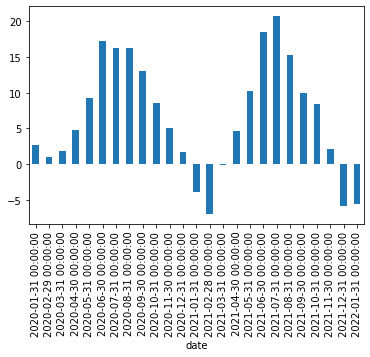

In [61]:
# box plot

df2['Temperature (C)'].resample(rule='M').mean().plot.bar();

Rolling and expanding

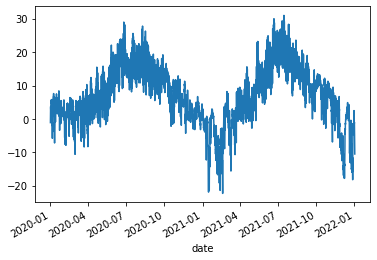

In [63]:
df2['Temperature (C)'].plot()

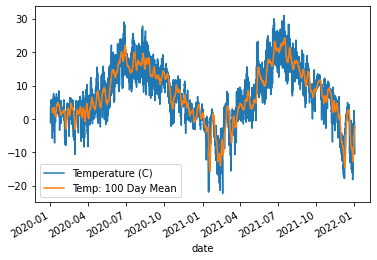

In [75]:
# add rolling

df2['Temp: 100 Day Mean'] = df2['Temperature (C)'].rolling(window=100).mean()
df2[['Temperature (C)','Temp: 100 Day Mean']].plot()

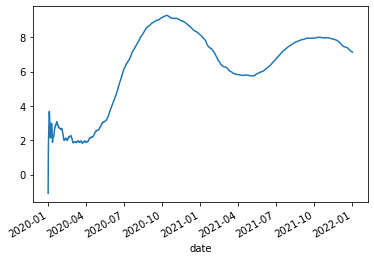

In [77]:
# add expanding

df2['Temperature (C)'].expanding().mean().plot()